In [2]:
from mpcbinning.controllers.controller import *
from mpcbinning.utils.data_manipulation import *


In [3]:
total_time = 100
t_step = 1
steps = int(total_time/t_step)


In [4]:
setup_mpc = {
    'n_robust': 1,
    'n_horizon': 5,
    't_step': t_step,
    'store_full_solution': True
}

model = template_model(False)
mpc = template_mpc(model, setup_mpc)
simulator = template_simulator(model, t_step)
estimator = do_mpc.estimator.StateFeedback(model)


In [5]:
%%capture

x_0 = np.array([20.68, 2.11])

mpc.x0 = x_0
simulator.x0 = x_0
estimator.x0 = x_0

mpc.set_initial_guess()

for k in range(steps):
    u = mpc.make_step(x_0)

    y_next = simulator.make_step(u)
    x_0 = estimator.make_step(y_next)

data = save_results(mpc, t_step)


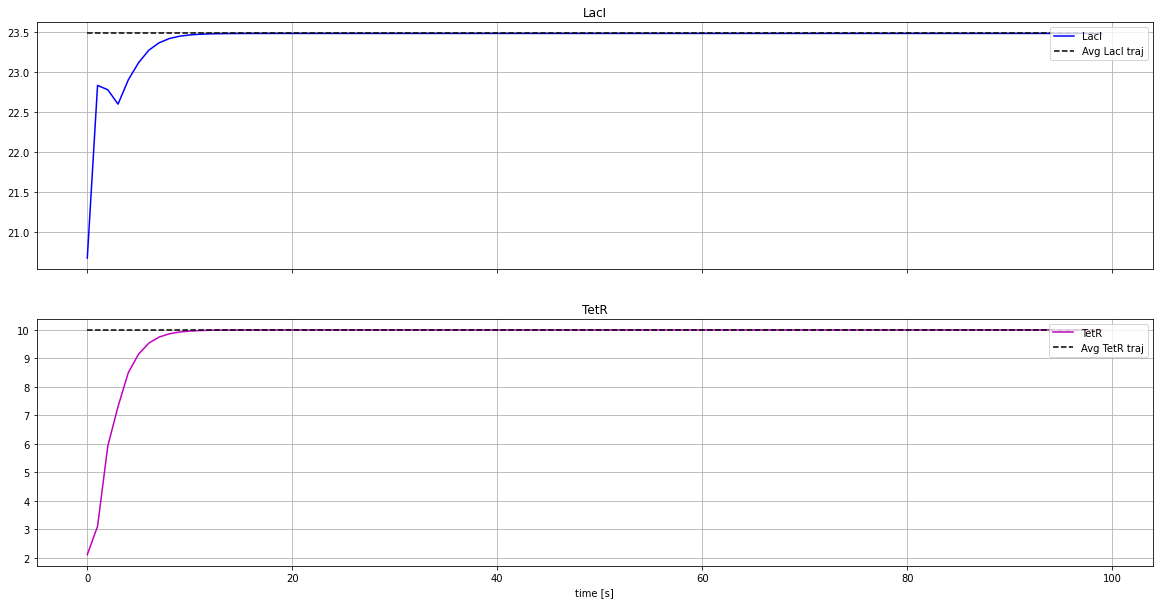

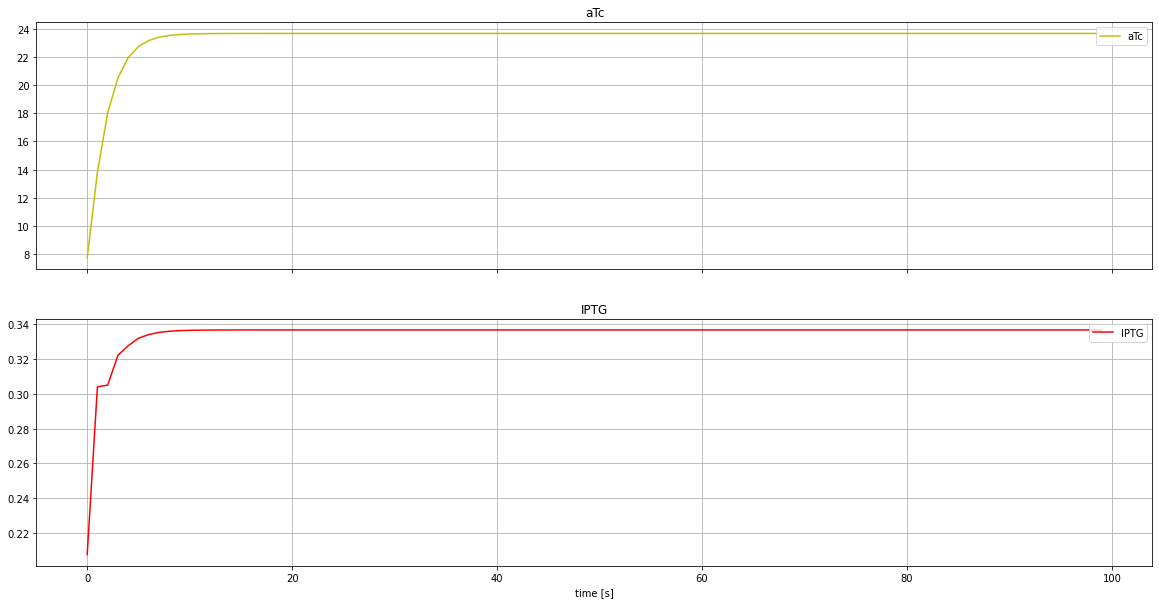

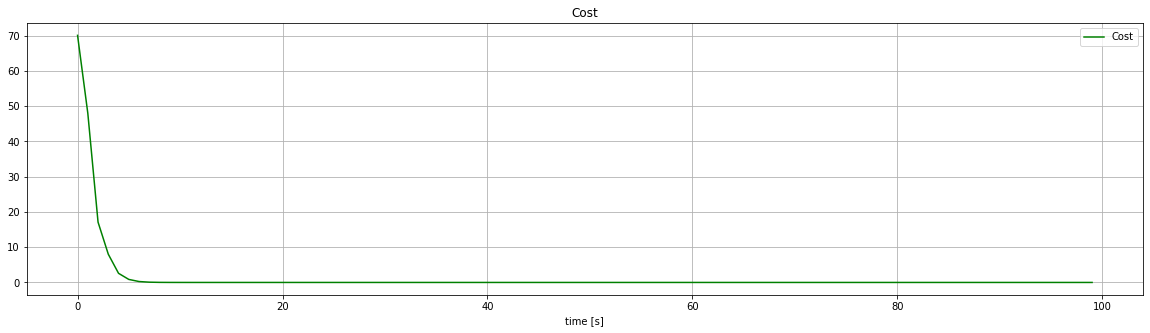

In [6]:
plot_results(data, total_time)

In [7]:
print(mpc.data['_u'])

[[ 7.6972061   0.20754759]
 [13.80745879  0.30403342]
 [18.02992129  0.30497521]
 [20.52205073  0.32208134]
 [21.95791653  0.3276118 ]
 [22.75018198  0.33191549]
 [23.18282571  0.33405684]
 [23.41645117  0.33528684]
 [23.54211918  0.33594166]
 [23.60951844  0.3362968 ]
 [23.64562108  0.33648698]
 [23.66494425  0.33658899]
 [23.67528262  0.33664359]
 [23.68081269  0.3366728 ]
 [23.68377043  0.33668843]
 [23.68535227  0.33669679]
 [23.68619824  0.33670126]
 [23.68665065  0.33670366]
 [23.68689259  0.33670493]
 [23.68702197  0.33670562]
 [23.68709117  0.33670598]
 [23.68712817  0.33670618]
 [23.68714796  0.33670628]
 [23.68715854  0.33670634]
 [23.6871642   0.33670637]
 [23.68716723  0.33670639]
 [23.68716884  0.33670639]
 [23.68716971  0.3367064 ]
 [23.68717017  0.3367064 ]
 [23.68717042  0.3367064 ]
 [23.68717055  0.3367064 ]
 [23.68717062  0.3367064 ]
 [23.68717066  0.3367064 ]
 [23.68717068  0.3367064 ]
 [23.68717069  0.3367064 ]
 [23.6871707   0.3367064 ]
 [23.6871707   0.3367064 ]
 

In [8]:
np.save('./data/target_policy.npy', mpc.data['_u'])